In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [4]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [5]:
# import uniform distribution
from scipy import stats

In [ ]:
import pandas as pd

In [ ]:
# I can't use this scipy library
print(dir(stats))

statsDF = pd.DataFrame(dir(stats))

statsDF[0]

statsDF.columns

statsDF.info()

statsDF.index[123]

for item in statsDF[0]:
    print(item)

statdisplay = statsDF[0]

statdisplay

a = stats.distributions

type(a)

type(a.binom)

a.binom.shapes

In [10]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = stats.uniform.rvs(size=n, loc = start, scale=width)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

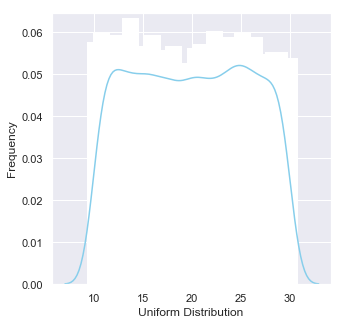

In [11]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

<span style="font-family: Cosmic Sans MS; font-size:2em">
The Gauss Distribution
$$f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$
</span>

The scipy.stats.norm usage https://blog.csdn.net/claroja/article/details/72830515

In [8]:
# generate random numbers from N(0,1)
data_normal = stats.norm.rvs(size=10000,loc=0,scale=1)# 一个连续的正态分布,loc代表了均值,scale代表标准差

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

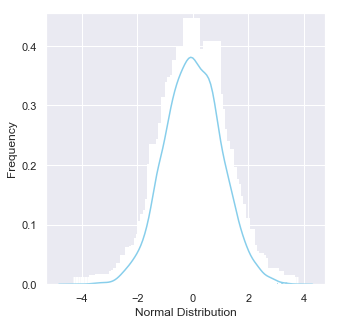

In [7]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [15]:
normal_expression = stats.norm.pdf(0, loc = 0, scale =1)
normal_expression

0.3989422804014327

> Python's warning system makes it difficult to tell exactly where the problematic code is, but that's a numpy warning and if it's coming from scipy then nothing seaborn can do about it.

In [2]:
# Disable warning message
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

<span style="font-family: Cosmic Sans MS; font-size:2em">
The Boltzman distribution
   
</span>

In [9]:
data_boltzman = stats.boltzmann.rvs(size=10000,loc=0)
ax = sns.distplot(data_boltzman,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Boltzman Distribution', ylabel='Frequency')

TypeError: _parse_args_rvs() missing 2 required positional arguments: 'lambda_' and 'N'

<span style="font-family: Cosmic Sans MS; font-size:2em">
The possion Distribution
    
$$f(n;\nu)=\frac{\nu^n}{n!}e^{-\nu}$$
</span>

<span style="font-family: Cosmic Sans MS; font-size:2em">
The Binomal Distribution
    
$$f(r;N,p)=\frac{N!}{r!(N-r)!}p^{r}(1-p)^{n-r}$$
</span>

<span style="font-family: Cosmic Sans MS; font-size:2em">
The Caucy, or Breit-weigner, or Lorentizian Distribution
    
$$f(E;M,\Gamma)=\frac{1}{2\pi}\frac{\Gamma}{(E-M)^2+(\Gamma/2)^2}$$
</span>

<span style="font-family: Cosmic Sans MS; font-size:2em">
The Landau Distribution
    
$$f(\lambda)=\frac{1}{\pi}\int_{0}^{\infty}e^{-u\ln u -\lambda u} \sin(\pi u) du$$
</span>

<span style="font-family: Cosmic Sans MS; font-size:2em">
The Negative Binomial Distribution
    
$$f(r; k, p)=\frac{(k+r-1)!}{r!(k-1)!}q^kp^r$$
</span>